In [1]:
import numpy as np
from numpy import linspace, array, zeros, insert, delete
from pandas import DataFrame, pivot_table

#mendefinisikan nilai fungsi dari contoh
def f(x):
    return(2*x)
        
D=1 #koefisien difusivitas
xm=10 #panjang penampang
A=0 #konsentrasi di x_0
B=64 #konsentrasi di x_m
deltat=3 #selisih waktu
tn=100 #batas waktu pada t_n
m=5 #banyak pemotongan pada penampang
deltax=xm/m #selisih antar posisi
lamda=(D*deltat)/(deltax)**2 #lamda

#melakukan uji kestabilan metode
if lamda<=0.5:
    print('Metode stabil, sebab lambda =', lamda, '<= 0.5')
else:
    print('Metode tidak stabil, cek kembali masukan')

#mendefinisikan matriks nol U berukuran (tn+1)x(m+1)
U=zeros((tn+1,m+1))

#mengisi syarat awal ke baris pertama matriks U
for i in range (m+1):
    
    U[0][i]=f(i*deltax)

#mengisi syarat batas
#ke kolom pertama dan kolom ke-(m+1) matriks U
for k in range (tn):
    for i in range (m-1):
        
        ii=i+2
        U[k+1][0]=A
    
    U[k+1][ii]=B

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
for k in range (tn):
    for i in range (m-1):
                
        ii=i+1
        U[k+1][ii]=lamda*U[k][ii-1]+(1-2*lamda)*U[k][ii]+lamda*U[k][ii+1]

U=delete(U,0,0)
        
#membuat keluaran berupa tabel nilai pendekatan
print('Tabel nilai pendekatan suhu di x = 0 sampai x =',m)
DataFrame(U)

Metode tidak stabil, cek kembali masukan
Tabel nilai pendekatan suhu di x = 0 sampai x = 5


,0,1,2,3,4,5
0,0.0,4.000000e+00,8.000000e+00,1.200000e+01,1.600000e+01,64.0
1,0.0,4.000000e+00,8.000000e+00,1.200000e+01,4.900000e+01,64.0
2,0.0,4.000000e+00,8.000000e+00,3.675000e+01,3.250000e+01,64.0
3,0.0,4.000000e+00,2.656250e+01,1.200000e+01,5.931250e+01,64.0
4,0.0,1.792188e+01,-1.281250e+00,5.840625e+01,2.734375e+01,64.0
...,...,...,...,...,...,...
95,0.0,-2.786644e+22,4.508885e+22,-4.508885e+22,2.786644e+22,64.0
96,0.0,4.774986e+22,-7.726089e+22,7.726089e+22,-4.774986e+22,64.0
97,0.0,-8.182060e+22,1.323885e+23,-1.323885e+23,8.182060e+22,64.0
98,0.0,1.402017e+23,-2.268511e+23,2.268511e+23,-1.402017e+23,64.0


In [2]:
#MEMBUAT GRAFIK FUNGSI U TERHADAP T

In [3]:
#SOLUSI ANALITIK
from numpy import linspace
from pandas import DataFrame

#deret Fourier sinus. Solusi "analitik" dari model difusi dimensi satu dalam u(x,t)=gg(t)
#Solusi analitik MSAB berupa deret Fourier sinus
#Deret dipotong sampai suku ke-12
#dipilih x=0
def gg0(t):
    return((64*0/10)+(-88/np.pi)*(((2/1)*(np.exp((-(1*np.pi/10)**2)*t))*np.sin(0*1*np.pi/10))+(0)
                      +((2/3)*(np.exp((-(3*np.pi/10)**2)*t))*np.sin(0*3*np.pi/10))+(0)
                      +((2/5)*(np.exp((-(5*np.pi/10)**2)*t))*np.sin(0*5*np.pi/10))+(0)
                      +((2/7)*(np.exp((-(7*np.pi/10)**2)*t))*np.sin(0*7*np.pi/10))+(0)
                      +((2/9)*(np.exp((-(9*np.pi/10)**2)*t))*np.sin(0*9*np.pi/10))+(0)
                      +((2/11)*(np.exp((-(11*np.pi/10)**2)*t))*np.sin(0*11*np.pi/10))+(0)
                      ))

#dipilih x=2
def gg2(t):
    return((64*2/10)+(-88/np.pi)*(((2/1)*(np.exp((-(1*np.pi/10)**2)*t))*np.sin(2*1*np.pi/10))+(0)
                      +((2/3)*(np.exp((-(3*np.pi/10)**2)*t))*np.sin(2*3*np.pi/10))+(0)
                      +((2/5)*(np.exp((-(5*np.pi/10)**2)*t))*np.sin(2*5*np.pi/10))+(0)
                      +((2/7)*(np.exp((-(7*np.pi/10)**2)*t))*np.sin(2*7*np.pi/10))+(0)
                      +((2/9)*(np.exp((-(9*np.pi/10)**2)*t))*np.sin(2*9*np.pi/10))+(0)
                      +((2/11)*(np.exp((-(11*np.pi/10)**2)*t))*np.sin(2*11*np.pi/10))+(0)
                      ))

#dipilih x=6
def gg6(t):
    return((64*6/10)+(-88/np.pi)*(((2/1)*(np.exp((-(1*np.pi/10)**2)*t))*np.sin(6*1*np.pi/10))+(0)
                      +((2/3)*(np.exp((-(3*np.pi/10)**2)*t))*np.sin(6*3*np.pi/10))+(0)
                      +((2/5)*(np.exp((-(5*np.pi/10)**2)*t))*np.sin(6*5*np.pi/10))+(0)
                      +((2/7)*(np.exp((-(7*np.pi/10)**2)*t))*np.sin(6*7*np.pi/10))+(0)
                      +((2/9)*(np.exp((-(9*np.pi/10)**2)*t))*np.sin(6*9*np.pi/10))+(0)
                      +((2/11)*(np.exp((-(11*np.pi/10)**2)*t))*np.sin(6*11*np.pi/10))+(0)
                      ))

#dipilih x=8
def gg8(t):
    return((64*8/10)+(-88/np.pi)*(((2/1)*(np.exp((-(1*np.pi/10)**2)*t))*np.sin(8*1*np.pi/10))+(0)
                      +((2/3)*(np.exp((-(3*np.pi/10)**2)*t))*np.sin(8*3*np.pi/10))+(0)
                      +((2/5)*(np.exp((-(5*np.pi/10)**2)*t))*np.sin(8*5*np.pi/10))+(0)
                      +((2/7)*(np.exp((-(7*np.pi/10)**2)*t))*np.sin(8*7*np.pi/10))+(0)
                      +((2/9)*(np.exp((-(9*np.pi/10)**2)*t))*np.sin(8*9*np.pi/10))+(0)
                      +((2/11)*(np.exp((-(11*np.pi/10)**2)*t))*np.sin(8*11*np.pi/10))+(0)
                      ))

In [4]:
#SOLUSI NUMERIK
#Program Interpolasi Lagrange
from numpy import linspace

def lagrange(x,xdata,ydata):
    if len(xdata)!=len(ydata):
        print('Error')
    else:
        n=len(xdata)
        P=0
        for i in range(0,n):
            Lk=1
            for j in range(0,n):
                if i==j:
                    continue
                else:
                    Lk=Lk*(x-xdata[j])/(xdata[i]-xdata[j])
            P=P+ydata[i]*Lk
        return(P)

xhasil=linspace(0,100,100)

#Interpolasi di 20 titik (bikin 20 iterasi, dengan deltat=0.2)
xhasil=linspace(0,100,100)
tdata=linspace(0,100,100)
udatax0=[]
udatax2=[]
udatax6=[]
udatax8=[]
for k in range (0,100):
    udatax0.append(U[k][0])
    udatax2.append(U[k][1])
    udatax6.append(U[k][3])
    udatax8.append(U[k][4])

interpolasix0=[]
interpolasix2=[]
interpolasix6=[]
interpolasix8=[]
for i in range(100):
    interpolasix0.append(lagrange(xhasil[i],tdata,udatax0))
    interpolasix2.append(lagrange(xhasil[i],tdata,udatax2))
    interpolasix6.append(lagrange(xhasil[i],tdata,udatax6))
    interpolasix8.append(lagrange(xhasil[i],tdata,udatax8))

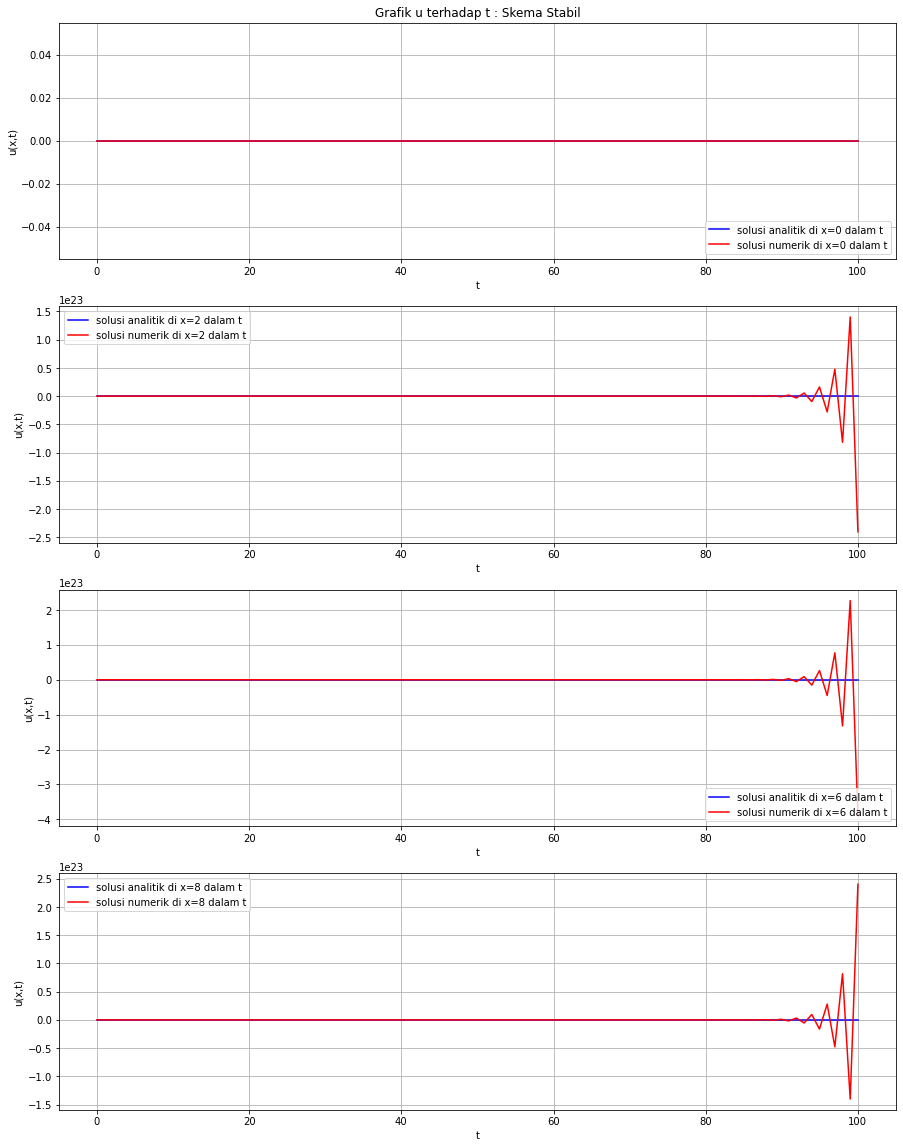

In [5]:
#GRAFIK u terhadap t
import matplotlib.pyplot as plt
from numpy import linspace

plt.figure(figsize=(15,20))
#plt.suptitle("Grafik u terhadap t : Skema Stabil")

plt.subplot(411)
t=linspace(0,100,100)
x=linspace(0,100,100)
plt.plot(t,gg0(t),label="solusi analitik di x=0 dalam t",color='b')
plt.plot(x,interpolasix0,label='solusi numerik di x=0 dalam t',color='r')
plt.title("Grafik u terhadap t : Skema Stabil")
plt.xlabel('t')
plt.ylabel('u(x,t)')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(412)
t=linspace(0,100,100)
x=linspace(0,100,100)
plt.plot(t,gg2(t),label="solusi analitik di x=2 dalam t",color='b')
plt.plot(x,interpolasix2,label='solusi numerik di x=2 dalam t',color='r')
#plt.title("Grafik u terhadap t : Skema Stabil")
plt.xlabel('t')
plt.ylabel('u(x,t)')
plt.legend(loc='best')
plt.grid()

plt.subplot(413)
t=linspace(0,100,100)
x=linspace(0,100,100)
plt.plot(t,gg6(t),label="solusi analitik di x=6 dalam t",color='b')
plt.plot(x,interpolasix6,label='solusi numerik di x=6 dalam t',color='r')
#plt.title("Grafik u terhadap t : Skema Stabil")
plt.xlabel('t')
plt.ylabel('u(x,t)')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(414)
t=linspace(0,100,100)
x=linspace(0,100,100)
plt.plot(t,gg8(t),label="solusi analitik di x=8 dalam t",color='b')
plt.plot(x,interpolasix8,label='solusi numerik di x=8 dalam t',color='r')
#plt.title("Grafik u terhadap t : Skema Stabil")
plt.xlabel('t')
plt.ylabel('u(x,t)')
plt.legend(loc='best')
plt.grid()

plt.show()

In [6]:
#MEMBUAT GRAFIK FUNGSI U TERHADAP X

In [7]:
#SOLUSI ANALITIK
from numpy import linspace
from pandas import DataFrame

#deret Fourier sinus. Solusi "analitik" dari model difusi dimensi satu dalam u(x,t)=hh(x)
#Solusi analitik MSAB berupa deret Fourier sinus
#Deret dipotong sampai suku ke-12
#dipilih t=5
def hh5(x):
    return((64*x/10)+(-88/np.pi)*(((2/1)*(np.exp((-(1*np.pi/10)**2)*5))*np.sin(x*1*np.pi/10))+(0)
                      +((2/3)*(np.exp((-(3*np.pi/10)**2)*5))*np.sin(x*3*np.pi/10))+(0)
                      +((2/5)*(np.exp((-(5*np.pi/10)**2)*5))*np.sin(x*5*np.pi/10))+(0)
                      +((2/7)*(np.exp((-(7*np.pi/10)**2)*5))*np.sin(x*7*np.pi/10))+(0)
                      +((2/9)*(np.exp((-(9*np.pi/10)**2)*5))*np.sin(x*9*np.pi/10))+(0)
                      +((2/11)*(np.exp((-(11*np.pi/10)**2)*5))*np.sin(x*11*np.pi/10))+(0)
                      ))

#dipilih t=20
def hh20(x):
    return((64*x/10)+(-88/np.pi)*(((2/1)*(np.exp((-(1*np.pi/10)**2)*20))*np.sin(x*1*np.pi/10))+(0)
                      +((2/3)*(np.exp((-(3*np.pi/10)**2)*20))*np.sin(x*3*np.pi/10))+(0)
                      +((2/5)*(np.exp((-(5*np.pi/10)**2)*20))*np.sin(x*5*np.pi/10))+(0)
                      +((2/7)*(np.exp((-(7*np.pi/10)**2)*20))*np.sin(x*7*np.pi/10))+(0)
                      +((2/9)*(np.exp((-(9*np.pi/10)**2)*20))*np.sin(x*9*np.pi/10))+(0)
                      +((2/11)*(np.exp((-(11*np.pi/10)**2)*20))*np.sin(x*11*np.pi/10))+(0)
                      ))

#dipilih t=50
def hh50(x):
    return((64*x/10)+(-88/np.pi)*(((2/1)*(np.exp((-(1*np.pi/10)**2)*50))*np.sin(x*1*np.pi/10))+(0)
                      +((2/3)*(np.exp((-(3*np.pi/10)**2)*50))*np.sin(x*3*np.pi/10))+(0)
                      +((2/5)*(np.exp((-(5*np.pi/10)**2)*50))*np.sin(x*5*np.pi/10))+(0)
                      +((2/7)*(np.exp((-(7*np.pi/10)**2)*50))*np.sin(x*7*np.pi/10))+(0)
                      +((2/9)*(np.exp((-(9*np.pi/10)**2)*50))*np.sin(x*9*np.pi/10))+(0)
                      +((2/11)*(np.exp((-(11*np.pi/10)**2)*50))*np.sin(x*11*np.pi/10))+(0)
                      ))

#dipilih t=99
def hh99(x):
    return((64*x/10)+(-88/np.pi)*(((2/1)*(np.exp((-(1*np.pi/10)**2)*99))*np.sin(x*1*np.pi/10))+(0)
                      +((2/3)*(np.exp((-(3*np.pi/10)**2)*99))*np.sin(x*3*np.pi/10))+(0)
                      +((2/5)*(np.exp((-(5*np.pi/10)**2)*99))*np.sin(x*5*np.pi/10))+(0)
                      +((2/7)*(np.exp((-(7*np.pi/10)**2)*99))*np.sin(x*7*np.pi/10))+(0)
                      +((2/9)*(np.exp((-(9*np.pi/10)**2)*99))*np.sin(x*9*np.pi/10))+(0)
                      +((2/11)*(np.exp((-(11*np.pi/10)**2)*99))*np.sin(x*11*np.pi/10))+(0)
                      ))

In [8]:
#SOLUSI NUMERIK
#Program Interpolasi Lagrange
from numpy import linspace

def lagrange(x,xdata,ydata):
    if len(xdata)!=len(ydata):
        print('Error')
    else:
        n=len(xdata)
        P=0
        for i in range(0,n):
            Lk=1
            for j in range(0,n):
                if i==j:
                    continue
                else:
                    Lk=Lk*(x-xdata[j])/(xdata[i]-xdata[j])
            P=P+ydata[i]*Lk
        return(P)

xhasil=linspace(0,10,100)

#Interpolasi di 20 titik (bikin 20 iterasi, dengan deltat=0.2)
xhasil=linspace(0,10,100)
xdata=linspace(0,10,m)
uudata5=[]
uudata20=[]
uudata50=[]
uudata99=[]
for ii in range (m):
    uudata5.append(U[5][ii+1])
    uudata20.append(U[20][ii+1])
    uudata50.append(U[50][ii+1])
    uudata99.append(U[99][ii+1])

interpolasiu5=[]
interpolasiu20=[]
interpolasiu50=[]
interpolasiu99=[]
for i in range(100):
    interpolasiu5.append(lagrange(xhasil[i],xdata,uudata5))
    interpolasiu20.append(lagrange(xhasil[i],xdata,uudata20))
    interpolasiu50.append(lagrange(xhasil[i],xdata,uudata50))
    interpolasiu99.append(lagrange(xhasil[i],xdata,uudata99))

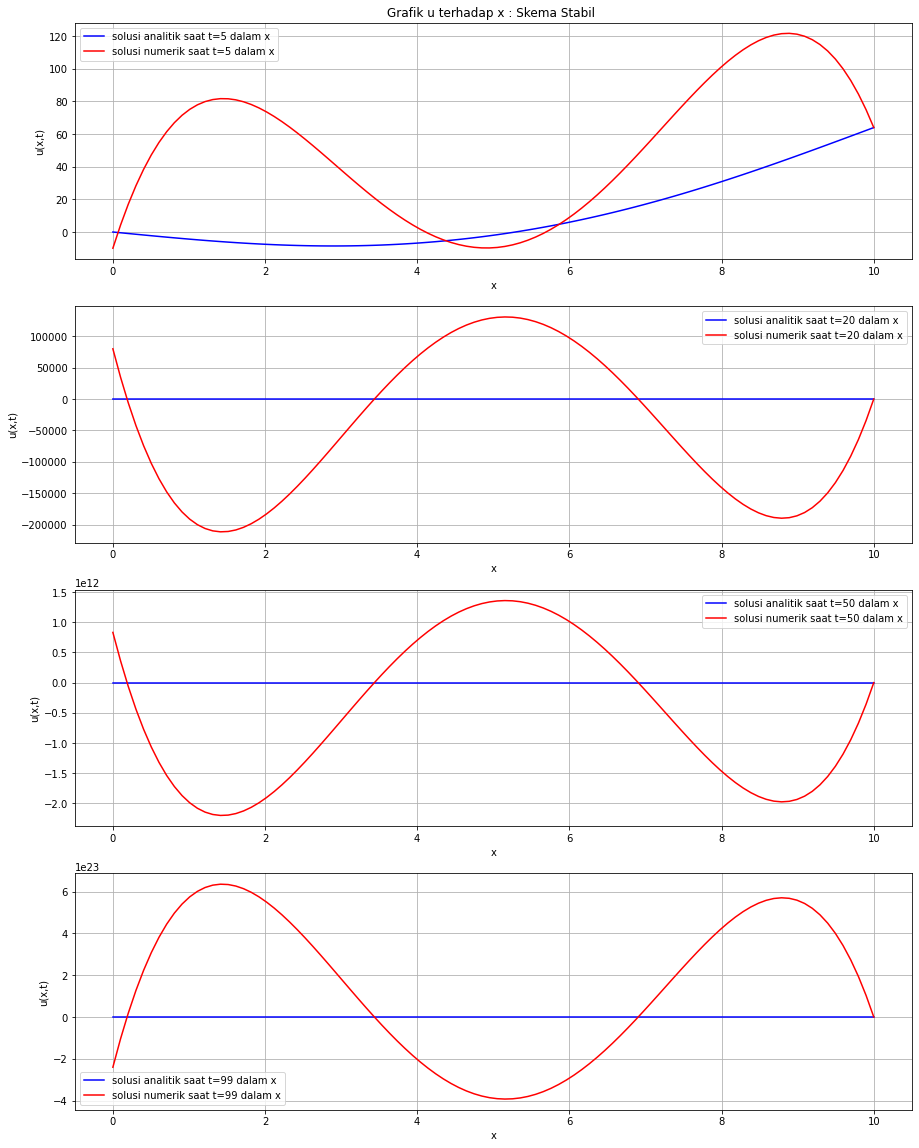

In [9]:
#GRAFIK (U, X)
import matplotlib.pyplot as plt
from numpy import linspace

plt.figure(figsize=(15,20))
#plt.suptitle("Grafik u terhadap x : Skema Stabil ")

plt.subplot(411)
t=linspace(0,10,100)
x=linspace(0,10,100)
plt.plot(t,hh5(t),label="solusi analitik saat t=5 dalam x",color='b')
plt.plot(x,interpolasiu5,label='solusi numerik saat t=5 dalam x',color='r')
plt.title("Grafik u terhadap x : Skema Stabil ")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend(loc='best')
plt.grid()

plt.subplot(412)
t=linspace(0,10,100)
x=linspace(0,10,100)
plt.plot(t,hh20(t),label="solusi analitik saat t=20 dalam x",color='b')
plt.plot(x,interpolasiu20,label='solusi numerik saat t=20 dalam x',color='r')
#plt.title("Skema Stabil")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend(loc='best')
plt.grid()

plt.subplot(413)
t=linspace(0,10,100)
x=linspace(0,10,100)
plt.plot(t,hh50(t),label="solusi analitik saat t=50 dalam x",color='b')
plt.plot(x,interpolasiu50,label='solusi numerik saat t=50 dalam x',color='r')
#plt.title("Skema Stabil")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend(loc='best')
plt.grid()

plt.subplot(414)
t=linspace(0,10,100)
x=linspace(0,10,100)
plt.plot(t,hh99(t),label="solusi analitik saat t=99 dalam x",color='b')
plt.plot(x,interpolasiu99,label='solusi numerik saat t=99 dalam x',color='r')
#plt.title("Skema Stabil")
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend(loc='best')
plt.grid()

plt.show()